Общий синтаксис основных команд Git

`git <команда> <аргументы команды>`

`git config`- команда для настройки параметров Git на компьютере.

>Ключ `--global` - глобальные изменения

    `git config --global user.name "Your Name"
    git config --global user.email "your_email@whatever.com"`

`git config --list` - вызовет список всех настроек

`git init` - Команда, создающая пустой репозиторий на компьютере
!инициализируется в том репозитории, в котором вызывается!

```python
git init
Initialized empty Git repository in A:/Курс DS-3.0/GIT-1. Markdown и Git для создания портфолио/DataCleaningProject/.git/
```

`git clone` - инициализирует репозиторий из уже существующего с
помощью копирования

```python
# git clone [ссылка на репозиторий]

git clone https://github.com/SkillfactoryDS/example
```

`git add` - Добавляет папку с файлами/файл в
 [индекс]('Индекс - это промежуточная область, в которую добавляются
 изменения перед коммитом. Сами файлы при этом остаются в рабочей
директории') ("индексирует") .
В аргументах - какой файл или папку надо добавить

`git add README.md` — добавляет файл README.md в индекс.
`git add data/` — добавляет папку data и всё её содержимое в индекс.
`git add .` - добавляет все файлы в текущем каталоге в индекс
 (кроме игнорируемых)

`git reset` - Удаляем файлы/папки из списка отслеживаемых

`git reset README.md` — удаляет файл README.md из индекса.
`git reset data/` — удаляет папку data из индекса.
`git reset .` - убирает из индекса все файлы из текущей директории

`git commit` - операция сохранения набора изменений с момента предыдущего
коммита

`git commit -m "fixed bag in function clean_data"` - написать сообщение
вместе с командой
`git commit -a -m "fixed bag in function clean_data"` - `-a` переносит все
отслеживаемые файлы в область подготовленных файлов и включает их в коммит.
`--amend` заменяет последний коммит новым изменённым коммитом, что бывает
полезно, если вы неправильно набрали сообщение последнего коммита или
забыли включить в него какие-то файлы.

`HEAD` — это указатель (то есть ссылка на один из коммитов), главное
назначение которого — определять, в каком состоянии находится рабочая
директория

`git cat-file -p HEAD` - посмтореть, на какой из коммитов указывает HEAD
 (команда `cat-file` с ключом `-p`)

`git status` - отследить состояние файлов в репозитории и узнать,
какие изменения необходимо зарегистрировать Git (при необходимости —
                                                 отменить)

`git status` - полная информация
`git status -s` - сжатая информация

**Префиксы:**

- *А* - отслеживаемый файл
- *??* - неотслеживаемый файл
- *АМ* - отслеживаемый и модифицированный файл

`git log` - список последних коммитов и их хеши.

`q` - выйти из режима логирования

`git show` - Вывести на экран информацию по определённому коммиту:
кто сделал этот коммит, когда это произошло, сообщение коммита, а
также сами изменения

`git show [хеш коммита]`

`git show a2815b`

`q` - Свернуть окно просмотра

`git checkout [хеш коммита]` - перемещение между коммитами
 ( передвижение указателя HEAD.)

`git checkout 90ab`

Для перемещения по коммитам можно использовать относительный путь с
помощью операторов:

- `~` - назад по истории коммитов
- `^` - вперед по истории коммитов

`git checkout HEAD~2`

В результате все файлы в директории перейдут в то состояние, которое
было зафиксировано в указанном коммите

`git revert` - создаёт **новый коммит**, который
**отменяет изменения**, внесённые в переданном коммите
 (последовательности коммитов)

- `git revert 62aa` создаст новый коммит, который отменяет изменения,
 сделанные в коммите `62aa`. (Закрыть редактор комбинацией клавиш ':'
  и 'q')
- `git revert 62aa --no-edit` - можно воспользоваться ключом
`--no-edit` и оставить сообщение нового коммита по умолчанию
 (рекомендуется).

Аналогично команде `checkout` можно воспользоваться относительным
путём. Например:

```python
git revert HEAD --no-edit #отмена изменений в текущем коммите
git revert HEAD~1 --no-edit #отмена изменений в предыдущем коммите
```

`.gitignore` - Расширение для файлов, для которых не должно вестись
отслеживание версий

Это текстовый файл с перечнем шаблонов файловых имен, которые не
должны отслеживаться

**Синтаксис**

- одна строка — один шаблон;

- пустые строки игнорируются;

- чтобы написать комментарий, в начале строки укажите знак #,
закомментированные строки не рассматриваются.

**Примеры**
- `debug.log`	Это самый простой случай. В результате применения
такого шаблона будут игнорироваться все файлы с указанным названием
во всех каталогах репозитория.

(debug.log, logs/debug.log, model/debug.log)

- `/debug.log`	Символ / в начале строки указывает, что правило
применяется только к файлам и каталогам, которые располагаются в том
же каталоге, что и сам файл *.gitignore*.

(debug.log, **!но не**, logs/debug.log, model/debug.log)

- `*.log`	Звёздочка (*) заменяет любое количество символов
 (в том числе и ноль).
В данном примере игнорируются все файлы с расширением *.log*
 независимо от того, где они находятся.

(debug.log, foo.log, logs/debug.log, **!но не**, foo.logger)

- `**/logs/`	Две звёздочки (**) используются для указания любого
 количества подкаталогов.
В данном примере игнорироваться будут все каталоги *logs* и их
 содержимое

(logs/debug.log, logs/monday/foo.txt, builds/logs/debug.log)

- `debug?.log`

Знак вопроса соответствует строго одному символу.

(debug0.log, debugg.log, **!но не** debug10.log)

- `*.log`
!important.log

Восклицательный знак в начале шаблона отменяет действие шаблона
 (инвертирует правило).
Если файл соответствует некоему шаблону, но при этом также
 соответствует отменяющему шаблону, указанному после, такой файл
 не будет игнорироваться.

(debug.log, foo.log, **!но не** important.log, logs/important.log)

`git rm` с параметром `--cached` - команда, чтобы удалить файл из
репозитория, но оставить его в рабочем каталоге как игнорируемый.

Удалить файл *debug.log* из коммита:

`git rm --cached debug.log`

`git remote add` - команда для добавления связанных **удаленных**
репозиториев

Общий *синтаксис*:

`git remote add [имя удаленного репозитория] [ссылка]`

`git remote remove` - Команда для отключения удаленного
репозитория

**Синтаксис**

`git remote remove [имя удаленного репозитория]`

`git push`- Команда, которая проводит отправку локальных
изменений из текущей ветки в удаленный репозиторий

**Синтаксис:**

`git push [имя удаленного репозитория][имя ветки]

`git fetch`- Команда для получения изменений с удаленного
репозитория. При этом приходит список изменений, но они не
вносятся в код, используемый в локальном репозитории

**Синтаксис:**

`git fetch [имя удаленного репозитория]`

`git merge` - Операция для слияния полученных с помощью команды
`fetch` изменений и текущей ветки локального репозитория.

Пример получения и слияния изменений из удалённого репозитория:

```python
git fetch origin
git merge origin/master
```

После выполнения этих команд все изменения, которые зафиксированы
 в удалённом репозитории, вступят в силу в локальном.

- `git pull` - Операция для получения изменений и объединения их
с локальным репозиторием. По умолчани. она эквивалентна
последовательному выполнению команд `git fetch` и `git merge`
(в случае уверенности в изменениях в удалённом репозитории)

Общий **синтаксис** команды:

`git pull [имя удаленного репозитория] [имя ветки]`

>**Интересный факт.** Представьте, что вы и другой разработчик
одновременно клонируете репозиторий. Затем ваш коллега выполняет
команду `push`. Если вы попытаетесь выполнить такую же команду
после него, ваш `push` точно будет *отклонён*.
Для внесения ваших изменений вам требуется получить изменения с
удалённого репозитория и слить их с вашим программным кодом с
помощью команды `pull`.

---

Ветвление

`git branch`
Команда для создания/удаления ветви. Её полный **синтаксис**:

`git branch [наименование ветки]` - создание ветви
`git branch -D [наименование ветки]` - удаление ветки

`git checkout`
Команда, перемещающая указатель на определённую ветку (указатель на ветку — это указатель на последний коммит в ней.)

Можно создать ветку и тут же переместиться на нее, используя ключ `-b` в команде `checkout`:

`git checkout -b [название ветки]`

`branch` - Команда для просмотра списка всех локальных веток

```python
git branch
* master
* develop
```

Однако можно добавить **ключи**:

  - `-r` (от англ. remote). Выводит список **только удалённых** веток (тех, которые находятся в удалённом репозитории). **Пример**:

```python
git branch -r
* origin/master
```

  - `-a`. Выводит все ветки — как локальные, так и удаленные. **Пример**:

```python
git branch -a
* master 
* develop
* remotes/origin/master
```

Для просмотра **состояния** файлов, информации по **истории коммитов и изменений, которые в них были произведены** в текущей ветке, используются те же самые команды `status`, `log` и `show`, которые мы изучали ранее

`git merge`
Данная команда вносит коммиты из другой ветки в текущую. Её **синтаксис**:

`git merge [имя сливаемой ветки]`


Стратегии слияния:

- **Неявное слияние** - `fast-forvard` (коммиты не создаются):
```python
git checkout master
git merge develop
```

**В результате**
>1. Проверяется, что в ветке *master* отсутствуют коммиты, сделанные после ответвления *develop*.
>2. Проверяется, что не возникает **конфликтов** слияния.
>3. Переносится указатель *master* на коммит `9fab`.
Теперь ветка *develop* как бы стала веткой *master*.

- **Явное слиение** - `no-ff` (`no-fast-forvard`) (Объединяет изменения двух веток, создаются два родительских коммита)

```python
git checkout master
git merge –-no-ff develop
```

**В результате**
>1. Проверяется, нет ли **конфликтов** слияния. Если возникает конфликт, выполнение команды `git merge` **останавливается**, чтобы получить инструкции от пользователя.
>2. Все изменения из коммитов `81na` и `9fab` добавляются в индекс ветки *master*.
>3. Выполняется коммит.
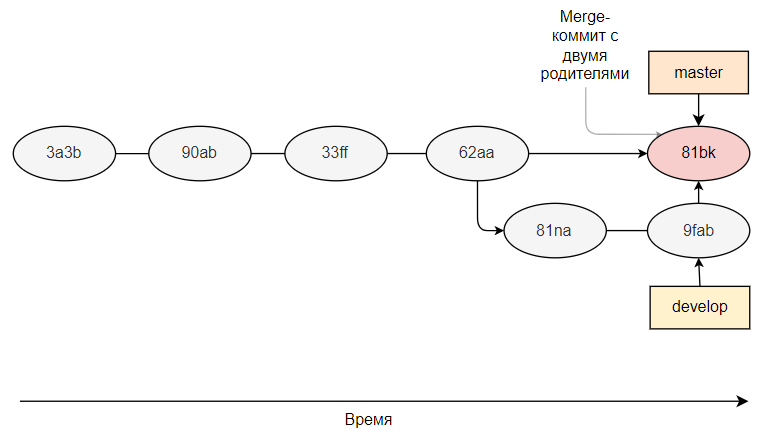